In [5]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [6]:
stock_data = pd.read_csv('reliance_stock_data_(1990-2023).csv')
stock_data

,Date,Price,Open,High,Low,Volume,Change%
0,Nov 03 2023,2319.70,2327.20,2334.95,2315.75,4.43M,-0.02%
1,Nov 02 2023,2320.20,2313.95,2324.30,2307.95,5.28M,0.99%
2,Nov 01 2023,2297.40,2289.15,2317.50,2275.20,5.15M,0.42%
3,Oct 31 2023,2287.90,2328.00,2328.00,2282.90,6.40M,-1.06%
4,Oct 30 2023,2312.50,2274.00,2325.00,2269.95,8.41M,2.06%
...,...,...,...,...,...,...,...
8146,Jan 08 1990,6.71,7.05,7.05,6.67,0,0.00%
8147,Jan 05 1990,6.71,6.37,6.71,6.37,0,3.23%
8148,Jan 04 1990,6.50,6.24,6.58,6.24,0,-6.07%
8149,Jan 03 1990,6.92,7.18,7.18,6.84,0,-4.81%


In [7]:
stock_data.set_index(pd.to_datetime(stock_data['Date']))

,Date,Price,Open,High,Low,Volume,Change%
Date,,,,,,,
2023-11-03,Nov 03 2023,2319.70,2327.20,2334.95,2315.75,4.43M,-0.02%
2023-11-02,Nov 02 2023,2320.20,2313.95,2324.30,2307.95,5.28M,0.99%
2023-11-01,Nov 01 2023,2297.40,2289.15,2317.50,2275.20,5.15M,0.42%
2023-10-31,Oct 31 2023,2287.90,2328.00,2328.00,2282.90,6.40M,-1.06%
2023-10-30,Oct 30 2023,2312.50,2274.00,2325.00,2269.95,8.41M,2.06%
...,...,...,...,...,...,...,...
1990-01-08,Jan 08 1990,6.71,7.05,7.05,6.67,0,0.00%
1990-01-05,Jan 05 1990,6.71,6.37,6.71,6.37,0,3.23%
1990-01-04,Jan 04 1990,6.50,6.24,6.58,6.24,0,-6.07%


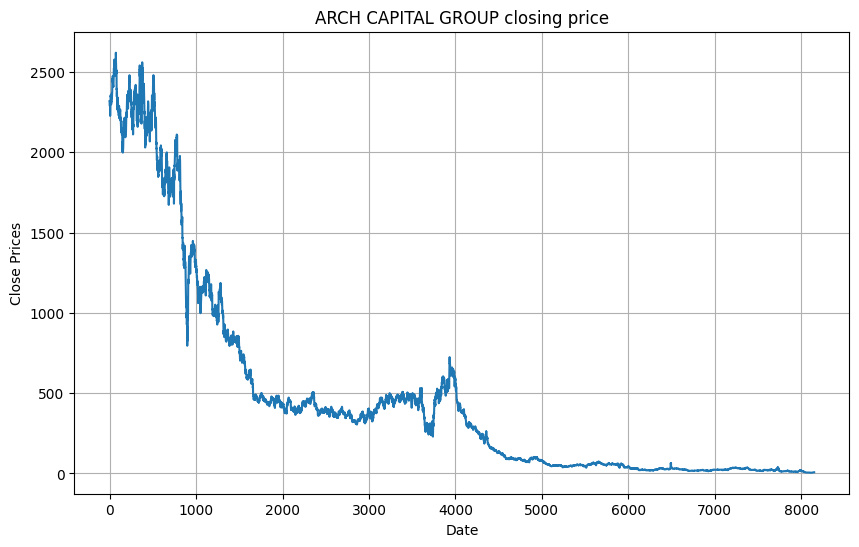

In [10]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(stock_data['Price'])
plt.title('ARCH CAPITAL GROUP closing price')
plt.show()

In [11]:
#Distribution of the dataset
df_close = stock_data['Close']
df_close.plot(kind='kde')

KeyError: 'Close'

In [ ]:
result = seasonal_decompose(df_close, model='multiplicative', period = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

In [ ]:
#if not stationary then eliminate trend
#Eliminate trend
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

In [ ]:
#split data into train and training set
train_data, test_data = df_log[3:int(len(df_log)*0.9)], df_log[int(len(df_log)*0.9):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [ ]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [ ]:
# Build Model
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train_data, order=(1,1,2))  
fitted = model.fit()  
print(fitted.summary())

In [ ]:
# Forecast
return_value = fitted.forecast(321, alpha=0.05)  # 95% conf

In [ ]:
return_value

In [ ]:
# Make a pandas series
# Plot
plt.figure(figsize=(10,5), dpi=100)
plt.plot(train_data, label='training data')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.title('ARCH CAPITAL GROUP Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('ARCH CAPITAL GROUP Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()